# Three Quadratic Functions

Copyright (C) 2020 Andreas Kloeckner, 2021 Thomas Golecki

<details>
<summary>MIT License</summary>
Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.
</details>

In [10]:
import numpy as np
import matplotlib.pyplot as pt

Consider the three equations:

$$y=x^2+\delta$$
$$z=x^2-\delta$$
$$y=z^2+\delta$$

In [11]:
delta = 0.5

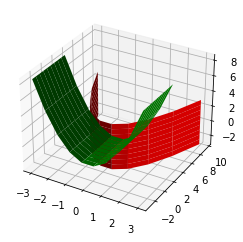

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = pt.figure()
ax = fig.add_subplot(111, projection='3d')

res = 10

x, z = np.mgrid[-3:3:res*1j,-3:3:res*1j]
y = x**2 + delta

ax.plot_surface(x, y, z, color="red", cstride=1, rstride=1)

if 1:
    y, x = np.mgrid[-3:3:res*1j,-3:3:res*1j]
    z = x**2 - delta
    
    ax.plot_surface(x, y, z, color="green", cstride=1, rstride=1)

if 0:
    x, z = np.mgrid[-3:3:res*1j,-3:3:res*1j]
    y = z**2 + delta
    
    ax.plot_surface(x, y, z, color="blue", cstride=1, rstride=1)

### Plotly
Try another plotting tool. Needs
```
pip install plotly
jupyter labextension install jupyterlab-plotly
```

In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

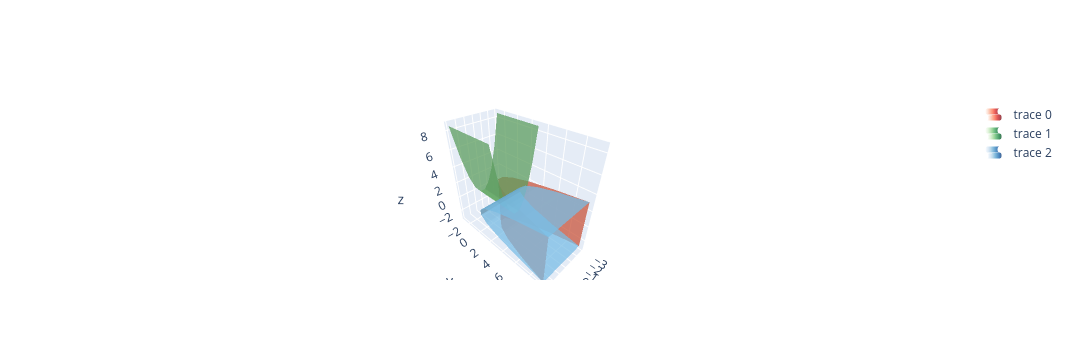

In [14]:
res = 10
delta = 0.5
x, z = np.mgrid[-3:3:res*1j,-3:3:res*1j]
y = x**2 + delta


fig= go.Figure()
#ax.plot_surface(x, y, z, color="red", cstride=1, rstride=1)
fig.add_trace(go.Surface(x=x, y=y, z=z, opacity=0.75, showscale=False, surfacecolor=np.ones_like(z),colorscale='reds',showlegend=True))

if 1:
    y, x = np.mgrid[-3:3:res*1j,-3:3:res*1j]
    z = x**2 - delta
    
    #ax.plot_surface(x, y, z, color="green", cstride=1, rstride=1)
    fig.add_trace(go.Surface(x=x, y=y, z=z, opacity=0.75, showscale=False, surfacecolor=np.ones_like(z),colorscale='greens',showlegend=True))

if 1:
    x, z = np.mgrid[-3:3:res*1j,-3:3:res*1j]
    y = z**2 + delta
    
    #ax.plot_surface(x, y, z, color="blue", cstride=1, rstride=1)
    fig.add_trace(go.Surface(x=x, y=y, z=z, opacity=0.75, showscale=False, surfacecolor=np.ones_like(z),colorscale='blues', showlegend=True))
fig.show()

### Paraview/Vtk

Still can't see intersections very well. Need *yet* another plotting tool. :)

In [22]:
!rm -f 1.vts 2.vts 3.vts

In [23]:
from pyvisfile.vtk import write_structured_grid

res = 50

x, z = np.mgrid[-3:3:res*1j,-3:3:res*1j]
y = x**2 + delta
mesh = np.array([x, y, z])

write_structured_grid("1.vts", mesh.reshape(3, res, 1, res))

# ----------------------------------

y, x = np.mgrid[-3:3:res*1j,-3:3:res*1j]
z = x**2 - delta
mesh = np.array([x, y, z])

write_structured_grid("2.vts", mesh.reshape(3, res, res, 1))

# ----------------------------------

x, z = np.mgrid[-3:3:res*1j,-3:3:res*1j]
y = z**2 + delta
mesh = np.array([x, y, z])

write_structured_grid("3.vts", mesh.reshape(3, res, 1, res))